<a href="https://colab.research.google.com/github/yweng-31/fastai-pytorch/blob/master/chinese_calligraphy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastai.vision.all import *
from fastbook import *


In [39]:
classes = ['lishu','kaishu','xiaozhuan']

In [40]:
folder='lishu'
file="lishu.csv"
path=Path('/Users/yangyangweng/Chinese calligraphy/data')
dest=path/folder
dest.mkdir(parents=True, exist_ok=True)
download_images(dest, path/file, max_pics=200)

# New Section

# New Section

In [41]:
folder='xiaozhuan'
file="xiaozhuan.csv"
path=Path('/Users/yangyangweng/Chinese calligraphy/data')
dest=path/folder
dest.mkdir(parents=True, exist_ok=True)
download_images(dest, path/file, max_pics=200)

In [42]:
folder='kaishu'
file="kaishu.csv"
path=Path('/Users/yangyangweng/Chinese calligraphy/data')
dest=path/folder
dest.mkdir(parents=True, exist_ok=True)
download_images(dest, path/file, max_pics=200)

In [43]:
calligraphy_types = 'lishu','kaishu','xiaozhuan'
if not path.exists():
    path.mkdir()
    for o in calligraphy_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        download_images(dest, urls=results.attrgot('contentUrl'))

In [44]:
fns = get_image_files(path)
fns

(#216) [Path('/Users/yangyangweng/Chinese calligraphy/data/kaishu/00000009.jpg'),Path('/Users/yangyangweng/Chinese calligraphy/data/kaishu/00000006.jpg'),Path('/Users/yangyangweng/Chinese calligraphy/data/kaishu/00000005.jpg'),Path('/Users/yangyangweng/Chinese calligraphy/data/kaishu/00000001.jpg'),Path('/Users/yangyangweng/Chinese calligraphy/data/kaishu/00000026.jpg'),Path('/Users/yangyangweng/Chinese calligraphy/data/kaishu/00000016.jpg'),Path('/Users/yangyangweng/Chinese calligraphy/data/kaishu/00000021.jpg'),Path('/Users/yangyangweng/Chinese calligraphy/data/kaishu/00000025.jpg'),Path('/Users/yangyangweng/Chinese calligraphy/data/kaishu/00000010.jpg'),Path('/Users/yangyangweng/Chinese calligraphy/data/kaishu/00000002.jpg')...]

In [45]:
failed = verify_images(fns)
failed

(#0) []

In [46]:
calligraphy = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [47]:
dls = calligraphy.dataloaders(path)
dls

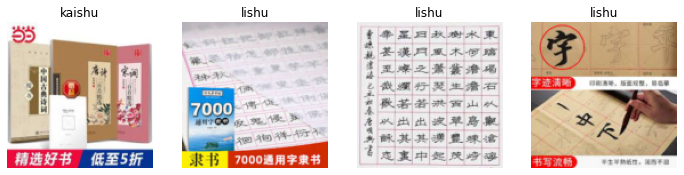

In [48]:
dls.valid.show_batch(max_n=4, nrows=1)

In [49]:
calligraphy = calligraphy.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = calligraphy.dataloaders(path)

In [35]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,2.415649,2.086380,0.674419,00:34


epoch,train_loss,valid_loss,error_rate,time
0,1.935631,1.643974,0.604651,00:59
1,1.757720,1.612242,0.581395,00:47
2,1.728833,1.572411,0.604651,00:45
3,1.658797,1.479587,0.604651,00:45


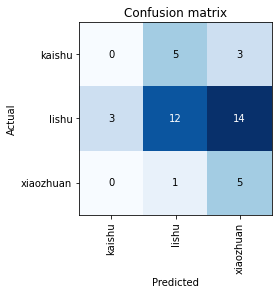

In [36]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

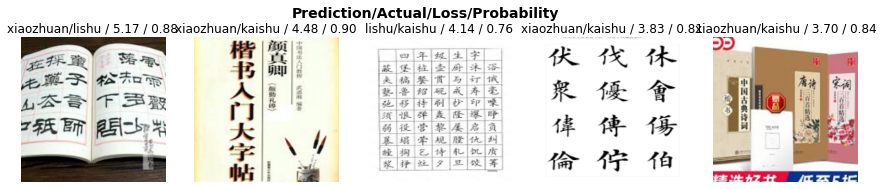

In [37]:
interp.plot_top_losses(5, nrows=1)